### 1. ANALISI PRELIMINARE E PULIZIA DATI


In [ ]:
#importazione delle librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import csv
import seaborn as sns

In [ ]:
#importazione file artisti + info
with open('/content/artisti.json', 'r') as f:
    data = json.load(f)
artisti = pd.DataFrame(data)
artisti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      50 non-null     int64 
 1   nome    50 non-null     object
 2   eta     50 non-null     object
 3   città   50 non-null     object
 4   stile   45 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [ ]:
#visualizzazione dati artisti
artisti.head(50)

,id,nome,eta,città,stile
0,1,Elvira Vattimo,25,Ruggero a mare,realistico
1,2,Michela Gabbana-Gargallo,30,Sebastiano sardo,graffiti
2,3,Marcello Romiti,26,Sesto Fredo ligure,realistico
3,4,Renzo Valmarana,19,Fredo nell'emilia,astratto
4,5,Dott. Patrizio Querini,27,San Puccio,3D
5,6,Giuseppina Franscini,$23,Settimo Giulia calabro,stencil
6,7,Gemma Peruzzi-Parini,17,Quarto Beppe,None
7,8,Susanna Prodi,#21,Quarto Giampiero umbro,stencil
8,9,Matteo Argenti,26,Irma calabro,astratto
9,10,Giuseppe Zecchini,#19,San Raffaele,3D


In [ ]:
#pulizia dati colonna 'eta' e cambio type
artisti['eta'] = artisti['eta'].astype(str).str.replace('[#$§]', '', regex=True)
artisti['eta'] = artisti['eta'].astype(int)
artisti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      50 non-null     int64 
 1   nome    50 non-null     object
 2   eta     50 non-null     int64 
 3   città   50 non-null     object
 4   stile   45 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [ ]:
#correzione dati null nella colonna 'stile' (moda)
artisti['stile'] = artisti['stile'].fillna(artisti['stile'].mode()[0])
artisti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      50 non-null     int64 
 1   nome    50 non-null     object
 2   eta     50 non-null     int64 
 3   città   50 non-null     object
 4   stile   50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [ ]:
artisti.head()

,id,nome,eta,città,stile
0,1,Elvira Vattimo,25,Ruggero a mare,realistico
1,2,Michela Gabbana-Gargallo,30,Sebastiano sardo,graffiti
2,3,Marcello Romiti,26,Sesto Fredo ligure,realistico
3,4,Renzo Valmarana,19,Fredo nell'emilia,astratto
4,5,Dott. Patrizio Querini,27,San Puccio,3D


In [ ]:
#importazione file interventi + info
interventi = pd.read_csv('/content/interventi.csv')
interventi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   artista_id            100 non-null    int64  
 2   spazio_id             100 non-null    int64  
 3   data_intervento       100 non-null    object 
 4   durata_minuti         100 non-null    int64  
 5   valutazione_giuria    90 non-null     float64
 6   valutazione_pubblico  90 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 5.6+ KB


In [ ]:
interventi.head(10)

,id,artista_id,spazio_id,data_intervento,durata_minuti,valutazione_giuria,valutazione_pubblico
0,1,7,8,"""18/07/2024 11:09""",60,2.0,NaN
1,2,43,24,"""18/03/2025 12:38""",9999,2.0,1.0
2,3,13,29,"""17/05/2025 00:33""",5,2.0,1.0
3,4,38,17,"""03/01/2025 00:57""",90,5.0,2.0
4,5,37,22,"""09/29/2024 07:42""",60,1.0,1.0
5,6,3,15,"""05/10/2024 13:05""",5,5.0,1.0
6,7,18,13,"""22/05/2025 10:07""",30,1.0,3.0
7,8,44,17,"""05/01/2025 13:47""",30,3.0,3.0
8,9,16,6,"""18/04/2025 22:53""",9999,5.0,NaN
9,10,10,26,"""16/02/2025 15:52""",90,1.0,2.0


In [ ]:
#pulizia dati nella colonna 'data_intervento'
interventi['data_intervento'] = interventi['data_intervento'].astype(str).str.replace('"', '', regex=True)
interventi.head()

,id,artista_id,spazio_id,data_intervento,durata_minuti,valutazione_giuria,valutazione_pubblico
0,1,7,8,18/07/2024 11:09,60,2.0,NaN
1,2,43,24,18/03/2025 12:38,9999,2.0,1.0
2,3,13,29,17/05/2025 00:33,5,2.0,1.0
3,4,38,17,03/01/2025 00:57,90,5.0,2.0
4,5,37,22,09/29/2024 07:42,60,1.0,1.0


In [ ]:
#cambio type colonna 'data_intervento'
interventi['data_intervento'] = pd.to_datetime(interventi['data_intervento'], format='mixed', dayfirst=False)
interventi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    100 non-null    int64         
 1   artista_id            100 non-null    int64         
 2   spazio_id             100 non-null    int64         
 3   data_intervento       100 non-null    datetime64[ns]
 4   durata_minuti         100 non-null    int64         
 5   valutazione_giuria    90 non-null     float64       
 6   valutazione_pubblico  90 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 5.6 KB


In [ ]:
# verifica presenza outlier
min_durata = interventi['durata_minuti'].min()
max_durata = interventi['durata_minuti'].max()
print(min_durata)
print(max_durata)

5
9999


In [ ]:
# pulizia outlier
interventi['durata_minuti'] = interventi['durata_minuti'].replace(9999, 90)
interventi.head(15)

,id,artista_id,spazio_id,data_intervento,durata_minuti,valutazione_giuria,valutazione_pubblico
0,1,7,8,2024-07-18 11:09:00,60,2.0,NaN
1,2,43,24,2025-03-18 12:38:00,90,2.0,1.0
2,3,13,29,2025-05-17 00:33:00,5,2.0,1.0
3,4,38,17,2025-03-01 00:57:00,90,5.0,2.0
4,5,37,22,2024-09-29 07:42:00,60,1.0,1.0
5,6,3,15,2024-05-10 13:05:00,5,5.0,1.0
6,7,18,13,2025-05-22 10:07:00,30,1.0,3.0
7,8,44,17,2025-05-01 13:47:00,30,3.0,3.0
8,9,16,6,2025-04-18 22:53:00,90,5.0,NaN
9,10,10,26,2025-02-16 15:52:00,90,1.0,2.0


In [ ]:
# Sostituzione valori nulli delle colonne 'valutazione' con la media calcolata
media_valutazione_g = interventi['valutazione_giuria'].mean()
media_valutazione_p = interventi['valutazione_pubblico'].mean()
interventi['valutazione_giuria'] = interventi['valutazione_giuria'].fillna(media_valutazione_g)
interventi['valutazione_pubblico'] = interventi['valutazione_pubblico'].fillna(media_valutazione_p)
interventi.info()
interventi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    100 non-null    int64         
 1   artista_id            100 non-null    int64         
 2   spazio_id             100 non-null    int64         
 3   data_intervento       100 non-null    datetime64[ns]
 4   durata_minuti         100 non-null    int64         
 5   valutazione_giuria    100 non-null    float64       
 6   valutazione_pubblico  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 5.6 KB


,id,artista_id,spazio_id,data_intervento,durata_minuti,valutazione_giuria,valutazione_pubblico
0,1,7,8,2024-07-18 11:09:00,60,2.0,2.811111
1,2,43,24,2025-03-18 12:38:00,90,2.0,1.000000
2,3,13,29,2025-05-17 00:33:00,5,2.0,1.000000
3,4,38,17,2025-03-01 00:57:00,90,5.0,2.000000
4,5,37,22,2024-09-29 07:42:00,60,1.0,1.000000


In [ ]:
# importazione file spazi + info
spazi = pd.read_csv('/content/spazi.csv')
spazi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30 non-null     int64  
 1   nome_luogo     30 non-null     object 
 2   quartiere      27 non-null     object 
 3   superficie_mq  27 non-null     float64
 4   tipo           30 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


In [ ]:
spazi.head()

,id,nome_luogo,quartiere,superficie_mq,tipo
0,1,Viale Ottone,NaN,1000.0,centro civico
1,2,Incrocio Gloria,terme,50.0,piazza
2,3,Contrada Pacillo,sardo,20.0,muro privato
3,4,Canale Cassandra,salentino,50.0,centro civico
4,5,Via Dallara,umbro,1000.0,sottopasso


In [ ]:
# pulizia dati null delle colonne 'quartiere' (moda) e 'superficie' (media)
spazi['quartiere'] = spazi['quartiere'].fillna(spazi['quartiere'].mode()[0])
media_mq = spazi['superficie_mq'].mean()
spazi['superficie_mq'] = spazi['superficie_mq'].fillna(media_mq)
spazi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30 non-null     int64  
 1   nome_luogo     30 non-null     object 
 2   quartiere      30 non-null     object 
 3   superficie_mq  30 non-null     float64
 4   tipo           30 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


### 2. CREAZIONE VISUALIZZAZIONI

a. Dati dell’analisi univariata (delle singole features)

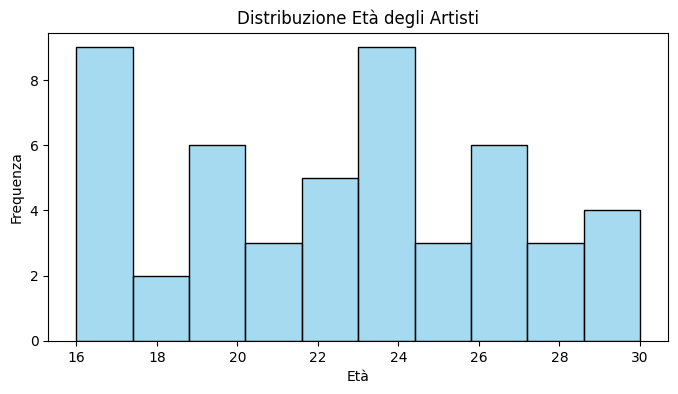

In [ ]:
# visualizzazione per il file artisti
plt.figure(figsize=(8, 4))
sns.histplot(artisti['eta'], bins=10, color='skyblue')
plt.title('Distribuzione Età degli Artisti')
plt.xlabel('Età')
plt.ylabel('Frequenza')
plt.show()

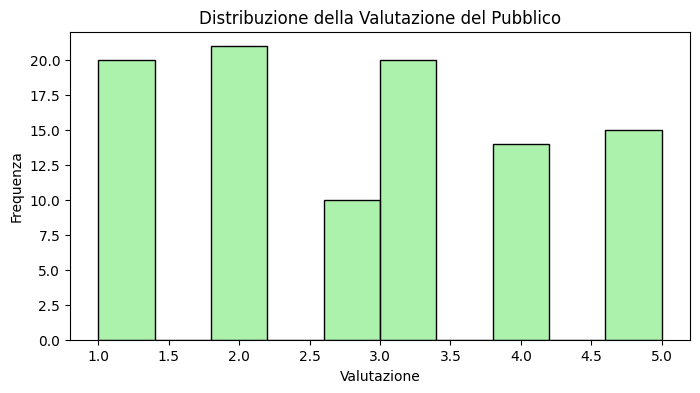

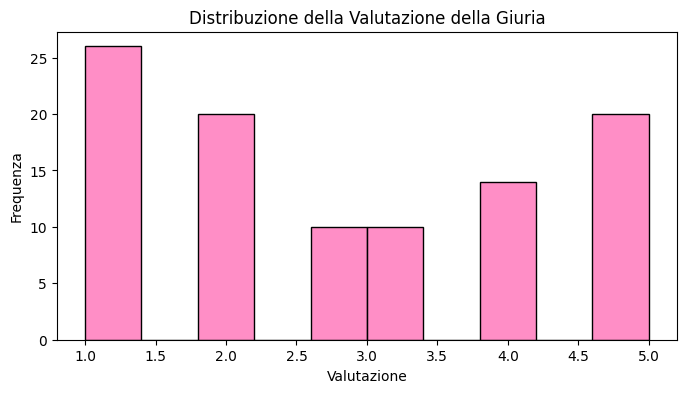

In [ ]:
# visualizzazione per il file interventi

plt.figure(figsize=(8, 4))
sns.histplot(interventi['valutazione_pubblico'], bins=10, color='lightgreen')
plt.title('Distribuzione della Valutazione del Pubblico')
plt.xlabel('Valutazione')
plt.ylabel('Frequenza')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(interventi['valutazione_giuria'], bins=10, color='hotpink')
plt.title('Distribuzione della Valutazione della Giuria')
plt.xlabel('Valutazione')
plt.ylabel('Frequenza')
plt.show()


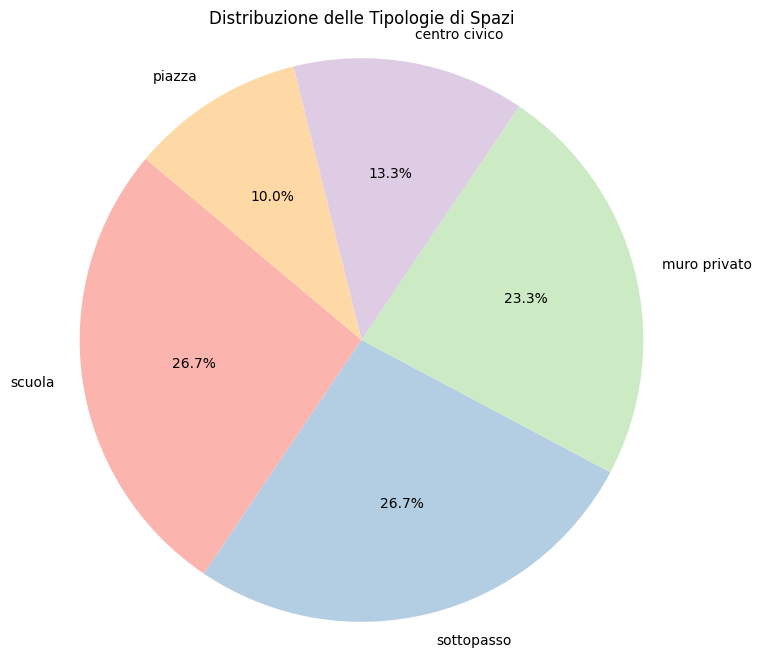

In [ ]:
# visualizzazione per il file spazi
conteggio = spazi['tipo'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(conteggio, labels=conteggio.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribuzione delle Tipologie di Spazi')
plt.axis('equal')
plt.show()

b. Eventuali correlazioni fra caratteristiche (heatmap, paiplot)

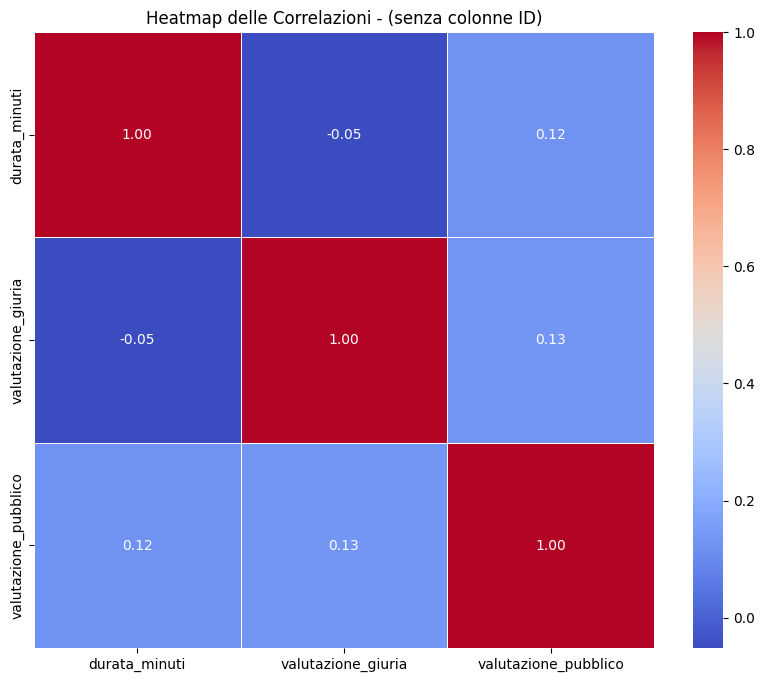

In [ ]:
# heatmap delle correlazioni fra dati di 'interventi' (escludendo le colonne id)
numeriche = interventi.select_dtypes(include='number')
numeriche_senza_id = numeriche.loc[:, ~numeriche.columns.str.contains('id', case=False)]
corr = numeriche_senza_id.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap delle Correlazioni - (senza colonne ID)')
plt.show()

c. Le valutazioni della giuria per tipo di spazio

<ipython-input-56-73404ee2fe44>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_valutazioni.values, y=media_valutazioni.index, palette='viridis')


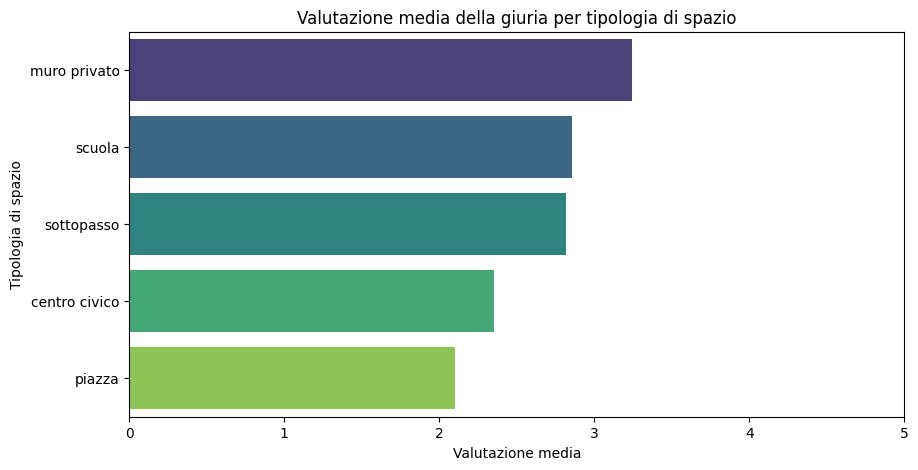

In [ ]:
merged_i_s = pd.merge(interventi, spazi, left_on='spazio_id', right_on='id')
media_valutazioni = merged_i_s.groupby('tipo')['valutazione_giuria'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=media_valutazioni.values, y=media_valutazioni.index, palette='viridis')
plt.title('Valutazione media della giuria per tipologia di spazio')
plt.xlabel('Valutazione media')
plt.ylabel('Tipologia di spazio')
plt.xlim(0, 5)
plt.show()

###3. RANKING

In [ ]:
# join finale tra i 3 df
final_merge = merged_i_s.merge(artisti, left_on='artista_id', right_on='id', suffixes=('_sp', '_art'))
final_merge.head(10)

,id_x,artista_id,spazio_id,data_intervento,durata_minuti,valutazione_giuria,valutazione_pubblico,id_y,nome_luogo,quartiere,superficie_mq,tipo,id,nome,eta,città,stile
0,1,7,8,2024-07-18 11:09:00,60,2.0,2.811111,8,Viale Ivan,nell'emilia,20.0,muro privato,7,Gemma Peruzzi-Parini,17,Quarto Beppe,3D
1,2,43,24,2025-03-18 12:38:00,90,2.0,1.000000,24,Via Flavio,ligure,5000.0,sottopasso,43,Sig.ra Valentina Balbo,23,Sesto Ottavio,realistico
2,3,13,29,2025-05-17 00:33:00,5,2.0,1.000000,29,Canale Ermes,sardo,20.0,sottopasso,13,Graziella Fabrizi,22,San Baccio a mare,stencil
3,4,38,17,2025-03-01 00:57:00,90,5.0,2.000000,17,Piazza Fausto,salentino,10.0,muro privato,38,Dott. Bianca Tron,17,Sesto Zaira umbro,3D
4,5,37,22,2024-09-29 07:42:00,60,1.0,1.000000,22,Viale Dante,laziale,50.0,scuola,37,Elvira Salandra-Ciani,20,Borgo Virginia umbro,astratto
5,6,3,15,2024-05-10 13:05:00,5,5.0,1.000000,15,Incrocio Dossi,a mare,10.0,muro privato,3,Marcello Romiti,26,Sesto Fredo ligure,realistico
6,7,18,13,2025-05-22 10:07:00,30,1.0,3.000000,13,Contrada Muti,veneto,10.0,sottopasso,18,Gustavo Monaco,25,Sesto Eraldo salentino,graffiti
7,8,44,17,2025-05-01 13:47:00,30,3.0,3.000000,17,Piazza Fausto,salentino,10.0,muro privato,44,Ruggiero Gonzaga,25,Quarto Enzo,3D
8,9,16,6,2025-04-18 22:53:00,90,5.0,2.811111,6,Contrada Gianinazzi,a mare,1000.0,sottopasso,16,Maria Cilea,24,Borgo Valentina salentino,3D
9,10,10,26,2025-02-16 15:52:00,90,1.0,2.000000,26,Rotonda Olga,lido,20.0,muro privato,10,Giuseppe Zecchini,19,San Raffaele,3D


In [ ]:
# pulizia colonne (rename e drop)
final_merge = final_merge.drop(['id_y', 'id'], axis=1)
final_merge = final_merge.rename(columns={'id_x': 'id_intervento'})
final_merge.head()

,id_intervento,artista_id,spazio_id,data_intervento,durata_minuti,valutazione_giuria,valutazione_pubblico,nome_luogo,quartiere,superficie_mq,tipo,nome,eta,città,stile
0,1,7,8,2024-07-18 11:09:00,60,2.0,2.811111,Viale Ivan,nell'emilia,20.0,muro privato,Gemma Peruzzi-Parini,17,Quarto Beppe,3D
1,2,43,24,2025-03-18 12:38:00,90,2.0,1.000000,Via Flavio,ligure,5000.0,sottopasso,Sig.ra Valentina Balbo,23,Sesto Ottavio,realistico
2,3,13,29,2025-05-17 00:33:00,5,2.0,1.000000,Canale Ermes,sardo,20.0,sottopasso,Graziella Fabrizi,22,San Baccio a mare,stencil
3,4,38,17,2025-03-01 00:57:00,90,5.0,2.000000,Piazza Fausto,salentino,10.0,muro privato,Dott. Bianca Tron,17,Sesto Zaira umbro,3D
4,5,37,22,2024-09-29 07:42:00,60,1.0,1.000000,Viale Dante,laziale,50.0,scuola,Elvira Salandra-Ciani,20,Borgo Virginia umbro,astratto


a. Artisti con più interventi

<ipython-input-59-419cad7e9b0a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interventi_per_artista.values, y=interventi_per_artista.index, palette='viridis')


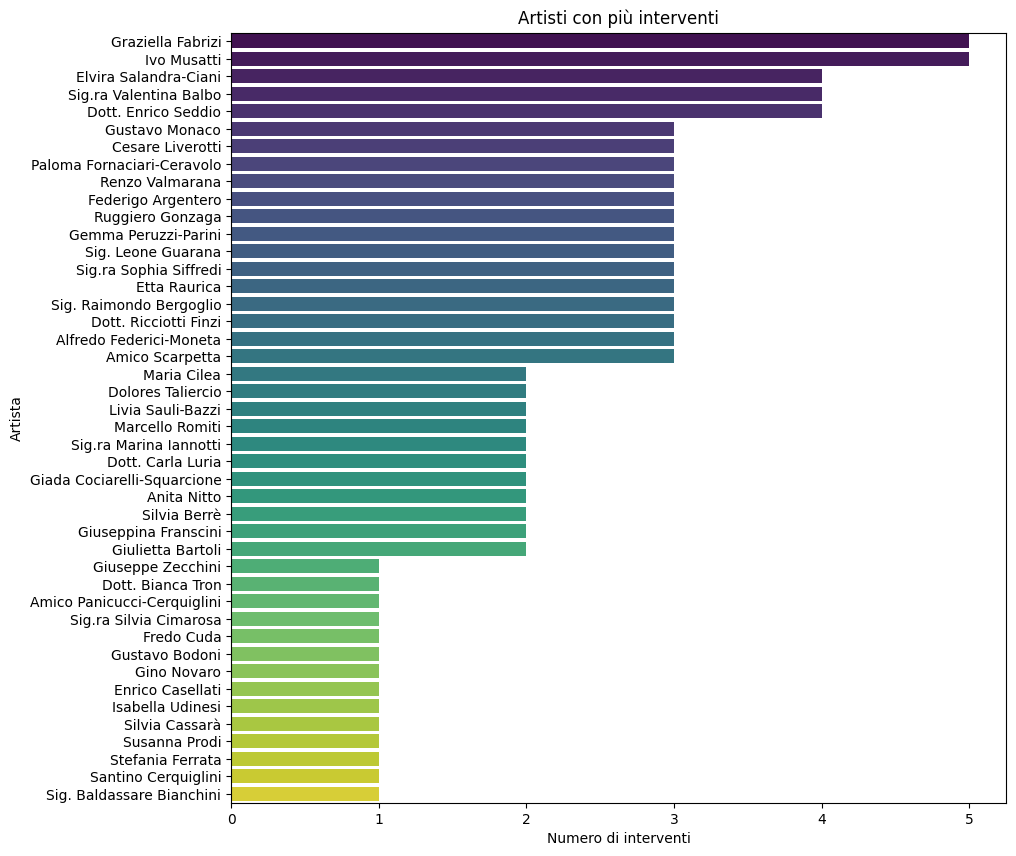

In [ ]:
interventi_per_artista = final_merge['nome'].value_counts()
plt.figure(figsize=(10, 10))
sns.barplot(x=interventi_per_artista.values, y=interventi_per_artista.index, palette='viridis')
plt.title('Artisti con più interventi')
plt.xlabel('Numero di interventi')
plt.ylabel('Artista')
plt.show()

b. Spazi più decorati

<ipython-input-60-382bdb33cb3d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interventi_per_spazio.values, y=interventi_per_spazio.index, palette='magma')


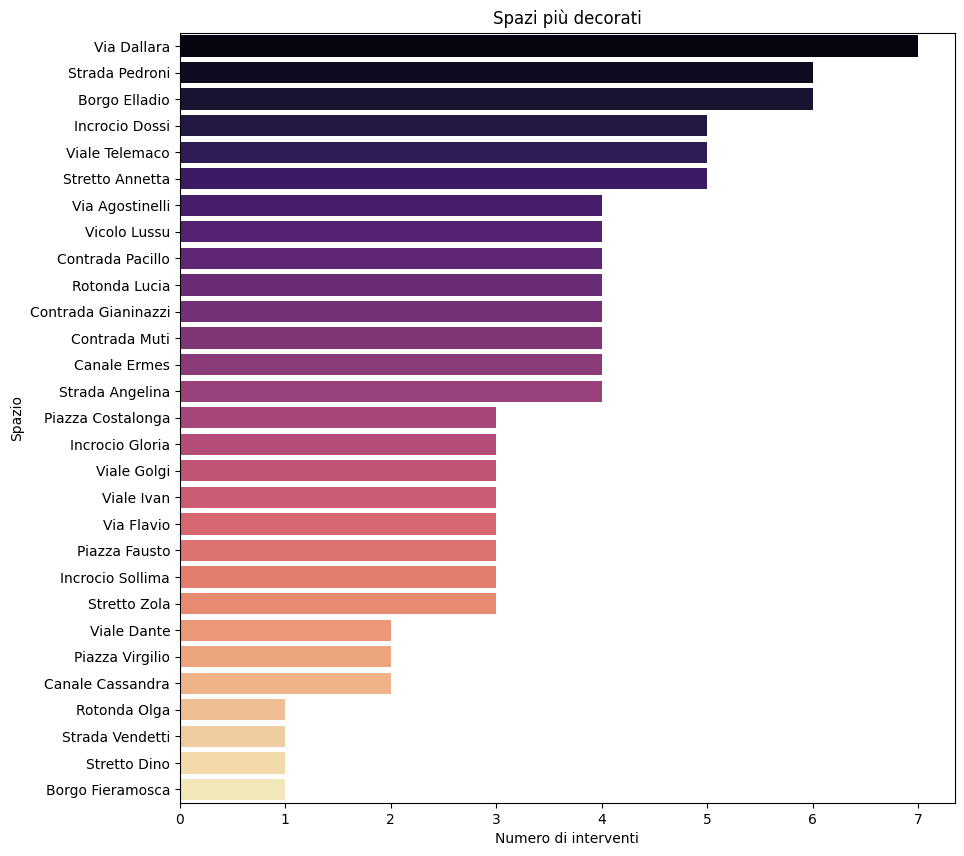

In [ ]:
interventi_per_spazio = final_merge['nome_luogo'].value_counts()

plt.figure(figsize=(10, 10))
sns.barplot(x=interventi_per_spazio.values, y=interventi_per_spazio.index, palette='magma')
plt.title('Spazi più decorati')
plt.xlabel('Numero di interventi')
plt.ylabel('Spazio')
plt.show()

c. Artisti più apprezzati dal Pubblico

<ipython-input-61-0d6c23a84e06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_pubblico_per_artista.values, y=media_pubblico_per_artista.index, palette='coolwarm')


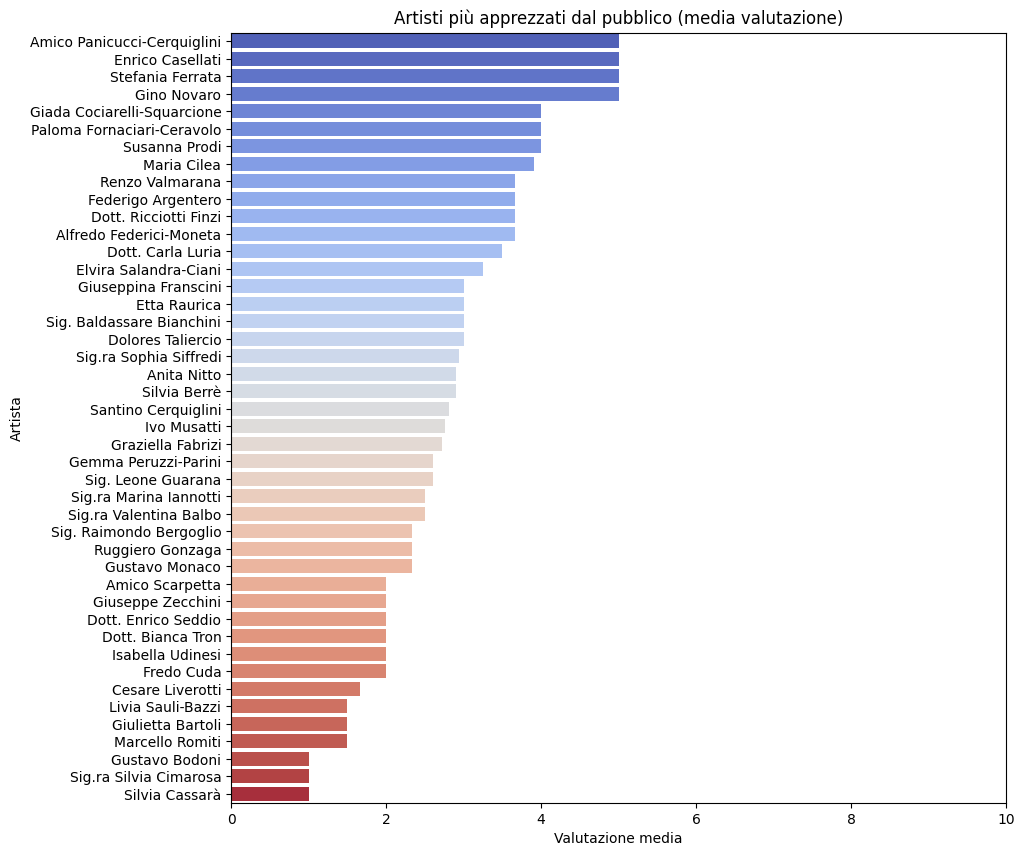

In [ ]:
media_pubblico_per_artista = final_merge.groupby('nome')['valutazione_pubblico'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(x=media_pubblico_per_artista.values, y=media_pubblico_per_artista.index, palette='coolwarm')
plt.title('Artisti più apprezzati dal pubblico (media valutazione)')
plt.xlabel('Valutazione media')
plt.ylabel('Artista')
plt.xlim(0, 10)
plt.show()

###4. SEGMENTAZIONE

In [ ]:
# Calcolo della media delle valutazioni per artista
final_merge['media_valutazione'] = (final_merge['valutazione_pubblico'] + final_merge['valutazione_giuria']) / 2
media_valutazione = final_merge.groupby('nome')['media_valutazione'].mean()
media_valutazione



,media_valutazione
nome,
Alfredo Federici-Moneta,3.133333
Amico Panicucci-Cerquiglini,3.000000
Amico Scarpetta,2.133333
Anita Nitto,2.452778
Cesare Liverotti,1.500000
Dolores Taliercio,2.250000
Dott. Bianca Tron,3.500000
Dott. Carla Luria,3.700000
Dott. Enrico Seddio,2.250000


<ipython-input-66-69668e25a383>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribuzione.values, y=distribuzione.index, palette='Purples')


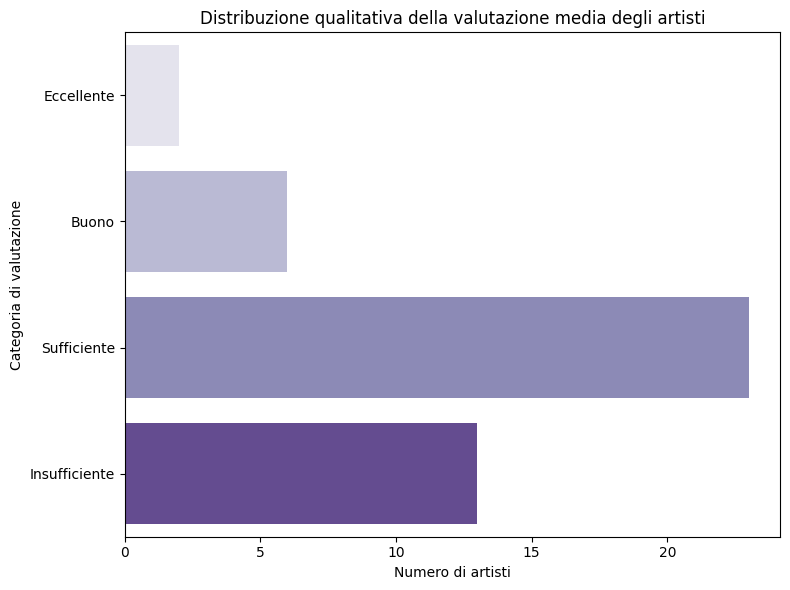

In [ ]:
# Categorizzare in base alla scala (1.0 - 5.0)
def categorizza(val):
    if val >= 4.5:
        return 'Eccellente'
    elif val >= 3.5:
        return 'Buono'
    elif val >= 2.5:
        return 'Sufficiente'
    else:
        return 'Insufficiente'

categorie = media_valutazione.apply(categorizza)
distribuzione = categorie.value_counts().reindex(['Eccellente', 'Buono', 'Sufficiente', 'Insufficiente'], fill_value=0)
plt.figure(figsize=(8, 6))
sns.barplot(x=distribuzione.values, y=distribuzione.index, palette='Purples')
plt.title('Distribuzione qualitativa della valutazione media degli artisti')
plt.xlabel('Numero di artisti')
plt.ylabel('Categoria di valutazione')
plt.tight_layout()
plt.show()
